## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [5]:
df_ = pd.read_csv('..\source\data.csv')
df = df_.copy()

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe([0.05,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
math_score,1000.0,66.089,15.163080,0.0,40.95,57.00,66.0,77.0,90.05,98.01,100.0
reading_score,1000.0,69.169,14.600192,17.0,44.00,59.00,70.0,79.0,92.00,100.00,100.0
writing_score,1000.0,68.054,15.195657,10.0,42.95,57.75,69.0,79.0,92.00,100.00,100.0


#### Insight
- From above description of numerical data, all means and standard deviations are very close to each other - between 66 and 68.05 for means and between 14.6 and 15.19 for std;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
- 95% of the scores is above 40,it may be an outlier.

### 3.7 Exploring Data

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


---------------gender---------------
        Count  Ratio
gender              
female    518   51.8
male      482   48.2


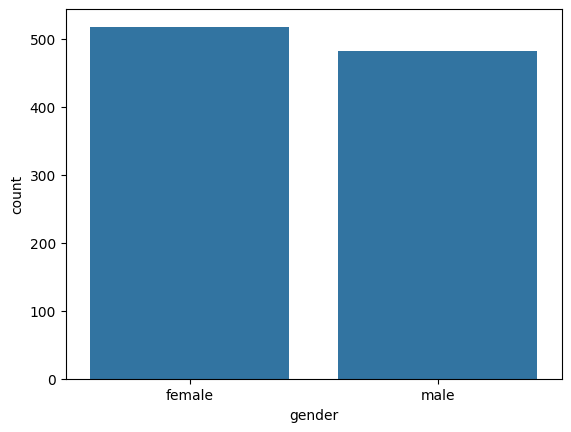

---------------race_ethnicity---------------
                Count  Ratio
race_ethnicity              
group C           319   31.9
group D           262   26.2
group B           190   19.0
group E           140   14.0
group A            89    8.9


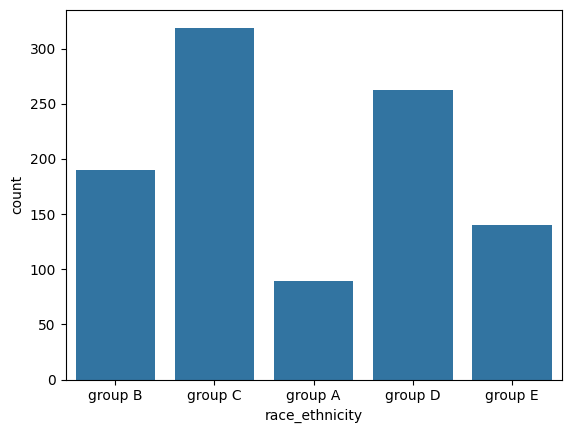

---------------parental_level_of_education---------------
                             Count  Ratio
parental_level_of_education              
some college                   226   22.6
associate's degree             222   22.2
high school                    196   19.6
some high school               179   17.9
bachelor's degree              118   11.8
master's degree                 59    5.9


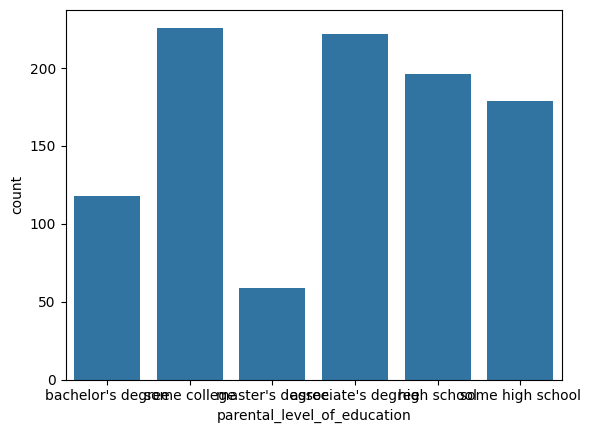

---------------lunch---------------
              Count  Ratio
lunch                     
standard        645   64.5
free/reduced    355   35.5


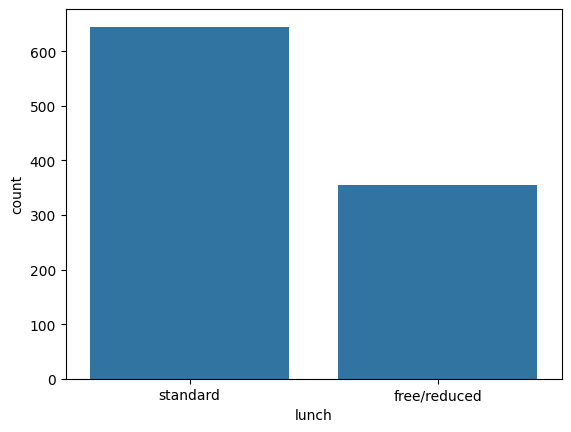

---------------test_preparation_course---------------
                         Count  Ratio
test_preparation_course              
none                       642   64.2
completed                  358   35.8


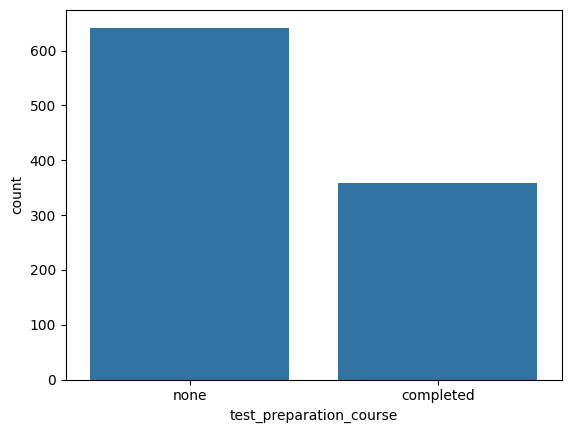

In [11]:
cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["object","category","bool"]]
def cat_summary(dataframe):
        for col in cat_cols:
            print("---------------"+col+"---------------")
            print(pd.DataFrame({"Count":dataframe[col].value_counts(),
                                "Ratio":100*dataframe[col].value_counts()/len(dataframe)}))
            sns.countplot(x=col,data=dataframe)
            plt.show(block=True)
cat_summary(df)

### 3.8 Adding columns for "Total Score" and "Average"


In [12]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 3.9 Number of students with full marks


In [13]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


### 3.10 Number of students with less than 20

In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

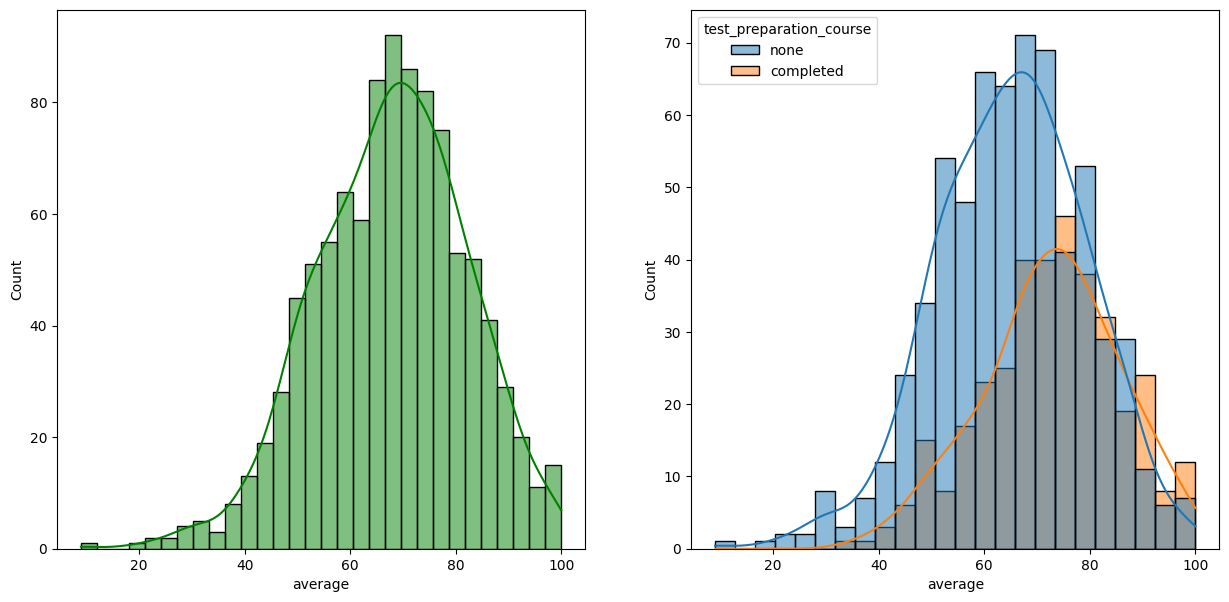

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='test_preparation_course')
plt.show()

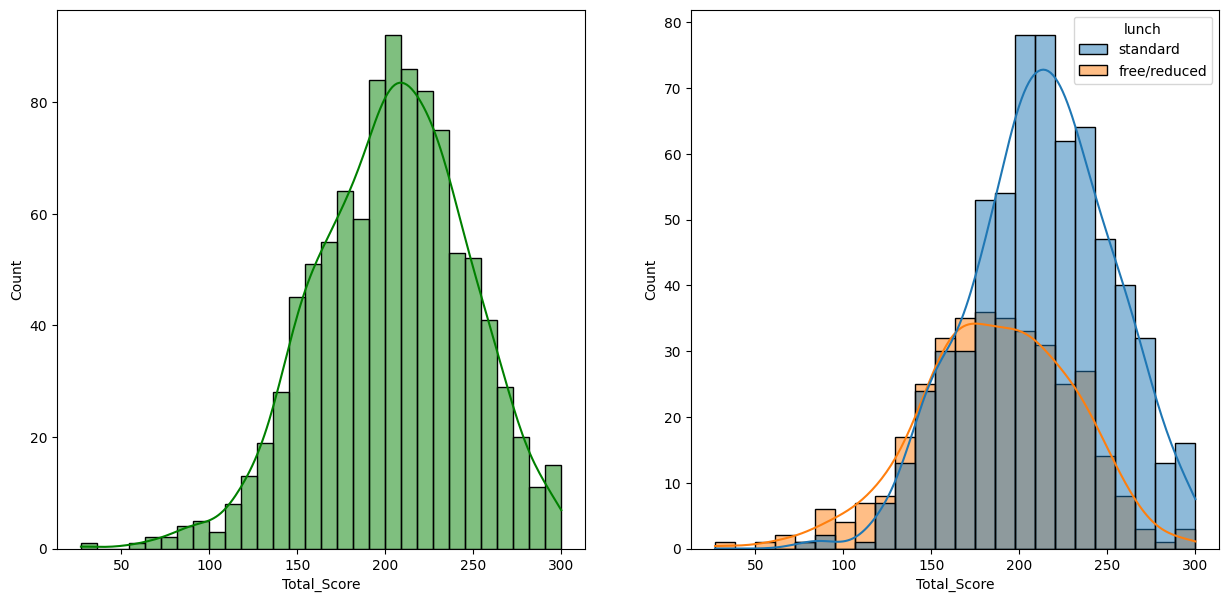

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='lunch')
plt.show()

#####  Insights
- As expected students who completed the preparation course scored higher than those who did not take any preparation courses.
- Standard lunch helps students get much better scores in the exams.

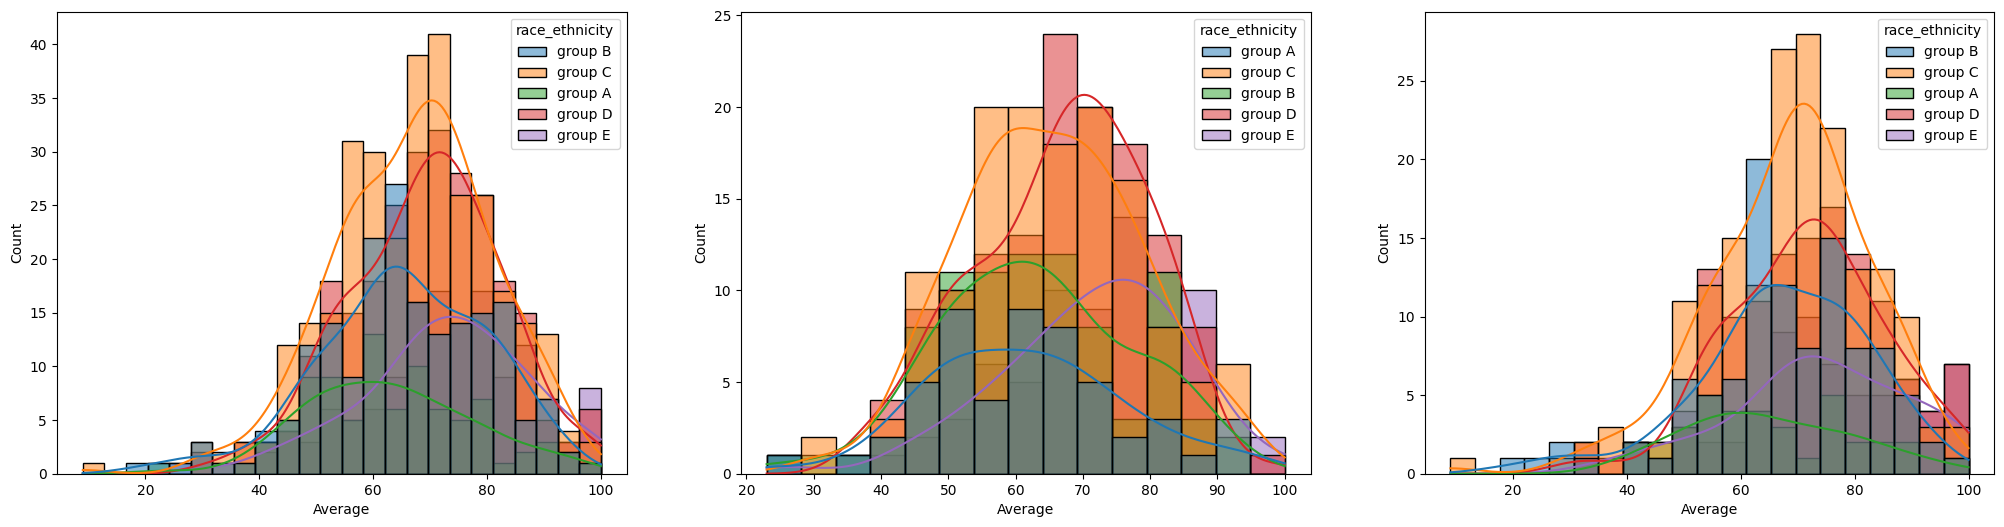

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- In general highest number of students belong to group C, this is a result of the higher number of female students in group C.
- In general group E's students are performing better than the other groups while group A's students are the worst, group D males perform better than group C males while the females of the two groups have similar scores.
- 2nd plot shows that most of the group D male students scored arround 70's and this group has the least number of students that scored full score.
- the comparasion between the 2nd and 3rd plot shows that the low scores average of males is higher than females' one, but higher number of females got higher scores.

#### 4.2 Multivariate analysis using pieplot

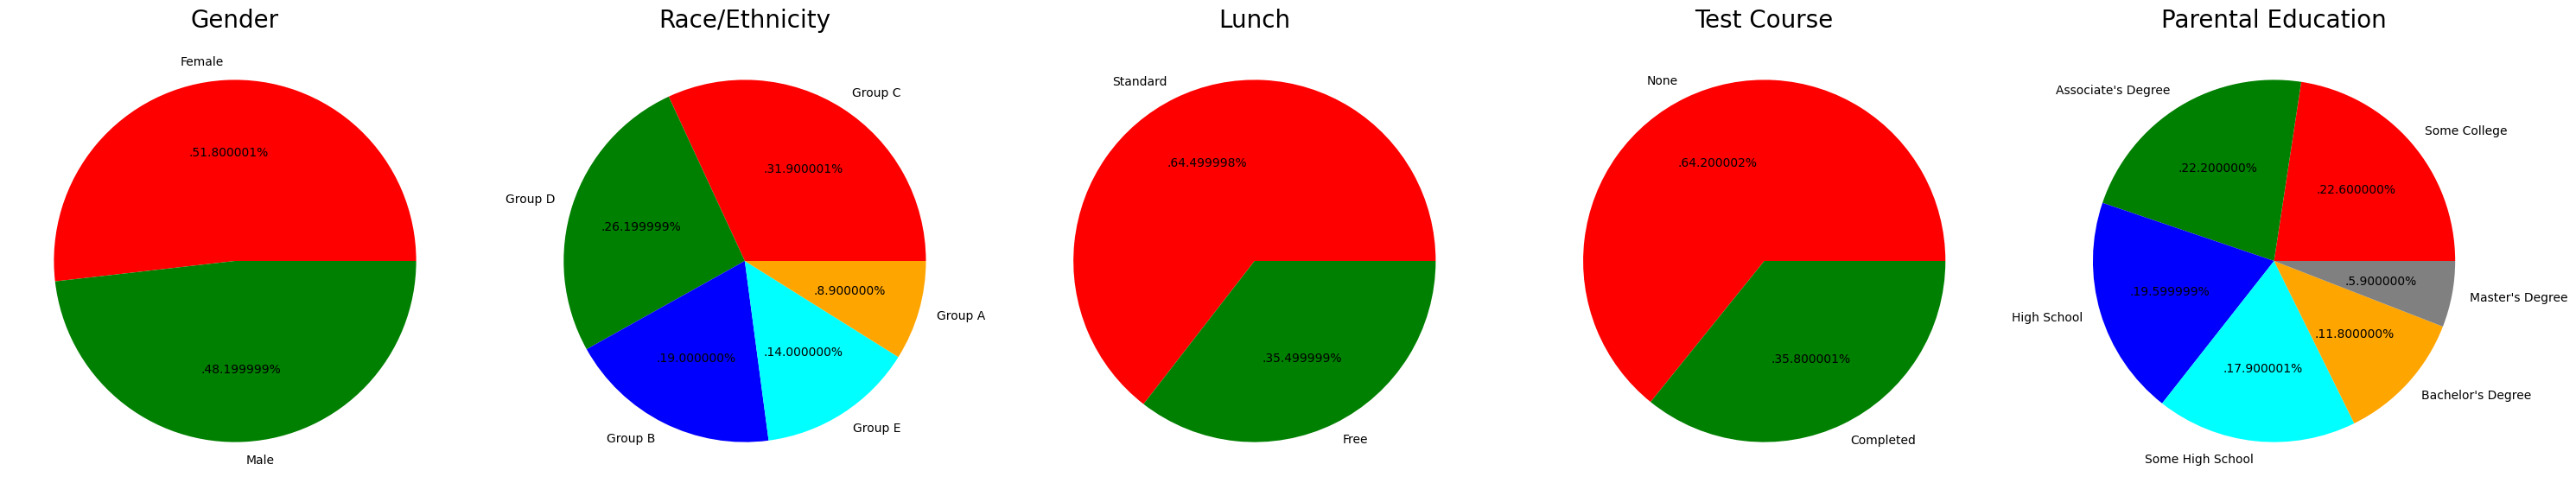

In [58]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.3 Feature Wise Visualization
#### 4.3.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

In [81]:
df.groupby('gender').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean',"Total_Score":['mean',"count"]}).reset_index()

gender math_score reading_score writing_score Total_Score      
                mean          mean          mean        mean count
0  female  63.633205     72.608108     72.467181  208.708494   518
1    male  68.728216     65.473029     63.311203  197.512448   482

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.3.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

In [87]:
df.groupby('race_ethnicity').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean',"Total_Score":['mean',"count"]}).reset_index().sort_values(by=("Total_Score","mean"),ascending=False)

race_ethnicity math_score reading_score writing_score Total_Score      
                       mean          mean          mean        mean count
4        group E  73.821429     73.028571     71.407143  218.257143   140
3        group D  67.362595     70.030534     70.145038  207.538168   262
2        group C  64.463950     69.103448     67.827586  201.394984   319
1        group B  63.452632     67.352632     65.600000  196.405263   190
0        group A  61.629213     64.674157     62.674157  188.977528    89

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

#### 4.3.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

In [88]:
df.groupby('parental_level_of_education').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean',"Total_Score":['mean',"count"]}).reset_index().sort_values(by=("Total_Score","mean"),ascending=False)

parental_level_of_education math_score reading_score writing_score  \
                                    mean          mean          mean   
3             master's degree  69.745763     75.372881     75.677966   
1           bachelor's degree  69.389831     73.000000     73.381356   
0          associate's degree  67.882883     70.927928     69.896396   
4                some college  67.128319     69.460177     68.840708   
5            some high school  63.497207     66.938547     64.888268   
2                 high school  62.137755     64.704082     62.448980   

  Total_Score        
         mean count  
3  220.796610    59  
1  215.771186   118  
0  208.707207   222  
4  205.429204   226  
5  195.324022   179  
2  189.290816   196

#### Insights 
- Largest number of parents are from some college/associate's degree.
- The score of student is related to the education level of his/her parents.

#### 4.3.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

In [92]:
df.groupby('lunch').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean',"Total_Score":['mean',"count"]}).reset_index().sort_values(by=("Total_Score","mean"),ascending=False)

lunch math_score reading_score writing_score Total_Score      
                      mean          mean          mean        mean count
1      standard  70.034109     71.654264     70.823256  212.511628   645
0  free/reduced  58.921127     64.653521     63.022535  186.597183   355

#### Insights 
- Students being served Standard lunch was more than free lunch
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.3.5 TEST PREPARATION COURSE COLUMN 
- Is it common for students to complete test preparation course?
- Is Test prepration course has any impact on student's performance ?

In [93]:
df.groupby('test_preparation_course').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean',"Total_Score":['mean',"count"]}).reset_index().sort_values(by=("Total_Score","mean"),ascending=False)

test_preparation_course math_score reading_score writing_score Total_Score  \
                                mean          mean          mean        mean   
0               completed  69.695531     73.893855     74.418994  218.008380   
1                    none  64.077882     66.534268     64.504673  195.116822   

         
  count  
0   358  
1   642

#### Insights  
- Higher number of students don't complete any preparation course.
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.3.6 CHECKING OUTLIERS

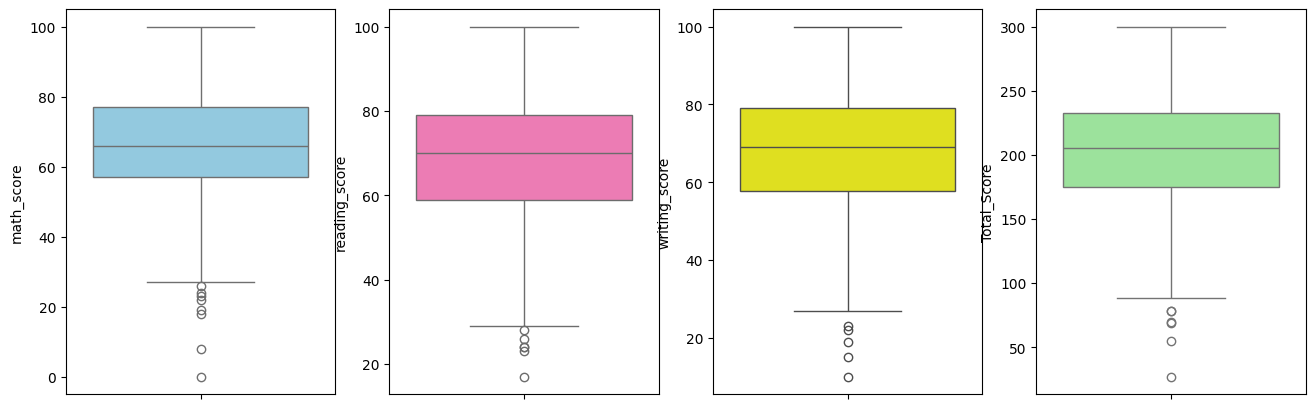

In [95]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Total_Score'],color='lightgreen')
plt.show()

#### Insights  
- Most of the outliers are within the low scores
- Math has more extreme outliers than the other two scores.

In [97]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def outlier_thresholds(dataframe, col_name, q1, q3, multiplier):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + multiplier * interquantile_range
    low_limit = quartile1 - multiplier * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name, q1, q3, multiplier):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3, multiplier)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def calculate_all_outlier_thresholds(dataframe, q1, q3, multiplier):
    thresholds = {}
    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:  # Numeric columns
            thresholds[col] = outlier_thresholds(dataframe, col, q1, q3, multiplier)
    return thresholds
def visualize_outlier_replacement(dataframe, variable, q1, q3, multiplier):
    # Calculate thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3, multiplier)
    
    # Plot before replacement
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=dataframe[variable])
    plt.title('Before Outlier Replacement')
    
    # Replace outliers
    dataframe_temp = dataframe.copy()  # Creating a copy to preserve original
    dataframe_temp[variable] = dataframe_temp[variable].clip(lower=low_limit, upper=up_limit)
    
    # Plot after replacement
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataframe_temp[variable])
    plt.title('After Outlier Replacement')
    
    plt.show()
def integrated_outlier_management(dataframe, q1=0.05, q3=0.95, multiplier=1.5):
    # Calculate thresholds for numeric columns only
    all_thresholds = calculate_all_outlier_thresholds(dataframe.select_dtypes(include=['float64', 'int64']), q1, q3, multiplier)
    
    for col in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        low_limit, up_limit = all_thresholds[col]
        
        # Now your check_outlier function needs to be called with just 'col' as it doesn't use low_limit and up_limit directly
        if check_outlier(dataframe, col, q1, q3, multiplier):
            logging.info(f'Outliers detected in {col}. Proceeding with analysis and replacement.')
            
            # Visualize outliers before replacement
            visualize_outlier_replacement(dataframe, col, q1, q3, multiplier)
            
            # Replace outliers and log the process
            dataframe[col] = dataframe[col].clip(lower=low_limit, upper=up_limit)
            logging.info(f"Replaced outliers in '{col}' with thresholds: {low_limit}, {up_limit}")
            
            logging.info(f'Outlier replacement completed for {col}.')
        else:
            logging.info(f'No significant outliers detected in {col}. No replacement necessary.')

integrated_outlier_management(df)

2024-04-17 07:35:56,594 - INFO - No significant outliers detected in math_score. No replacement necessary.
2024-04-17 07:35:56,597 - INFO - No significant outliers detected in reading_score. No replacement necessary.
2024-04-17 07:35:56,602 - INFO - No significant outliers detected in writing_score. No replacement necessary.
2024-04-17 07:35:56,610 - INFO - No significant outliers detected in Total_Score. No replacement necessary.
2024-04-17 07:35:56,613 - INFO - No significant outliers detected in Average. No replacement necessary.


#### 4.3.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

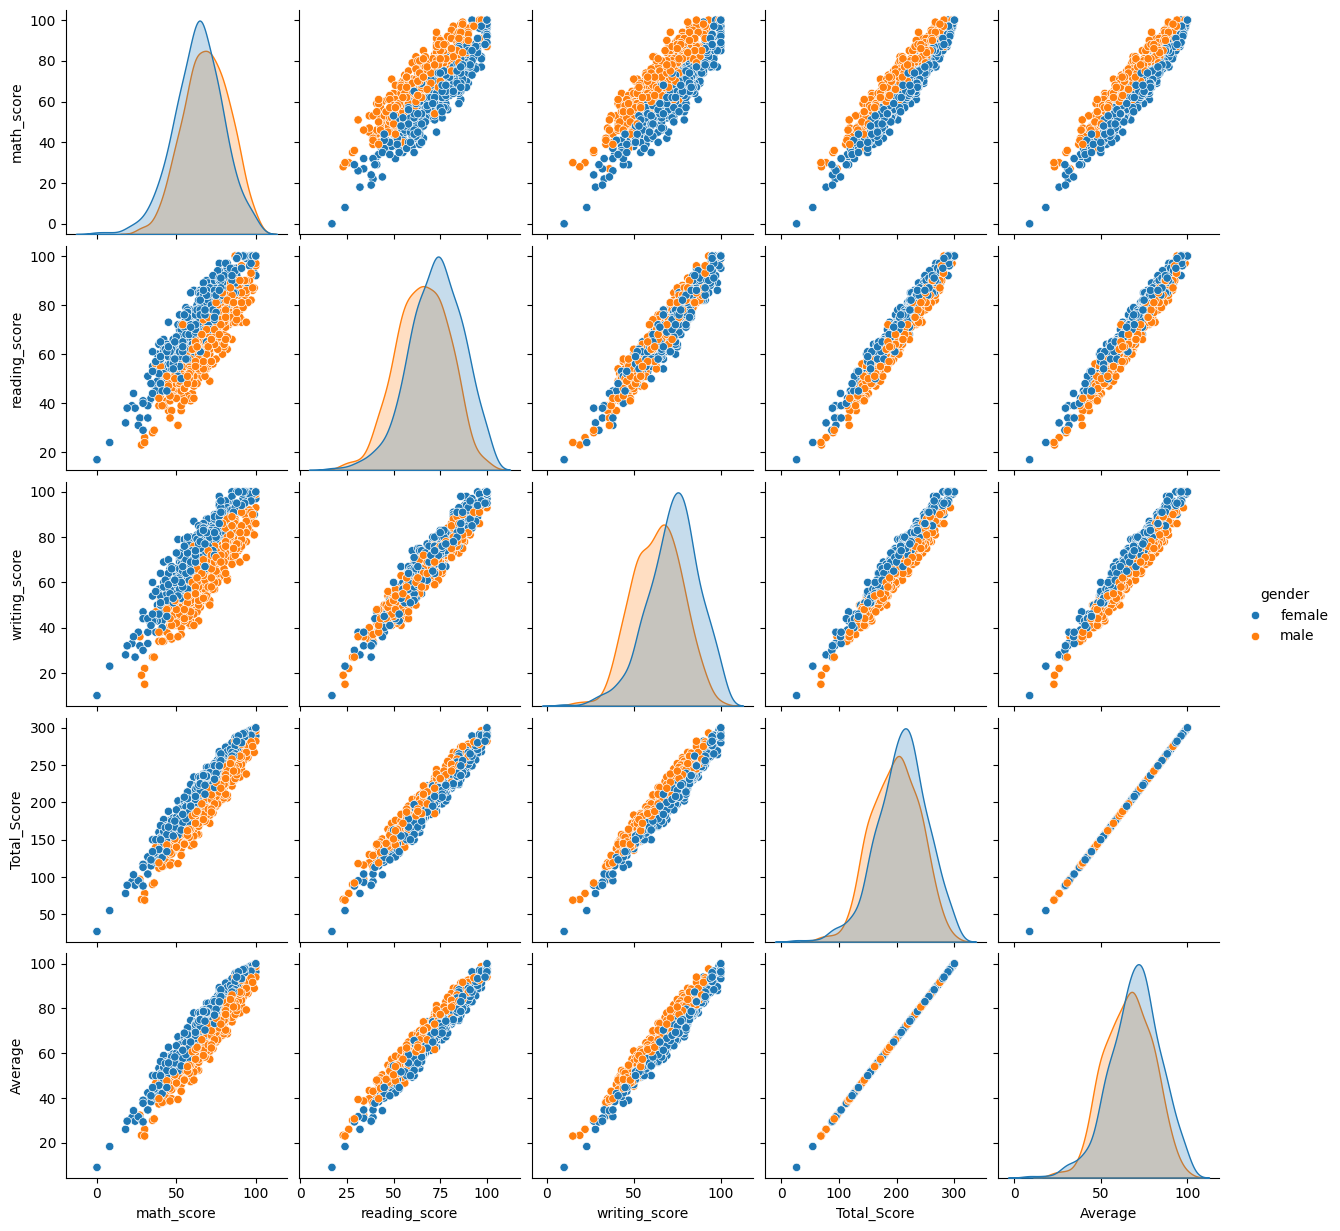

In [98]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

In [100]:
dff = pd.get_dummies(df, columns=cat_cols, drop_first=True,dtype="int64")
dff.head()

,math_score,reading_score,writing_score,Total_Score,Average,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,218,72.666667,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,82.333333,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,92.666667,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,49.333333,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,76.333333,1,0,1,0,0,0,0,0,1,0,1,1


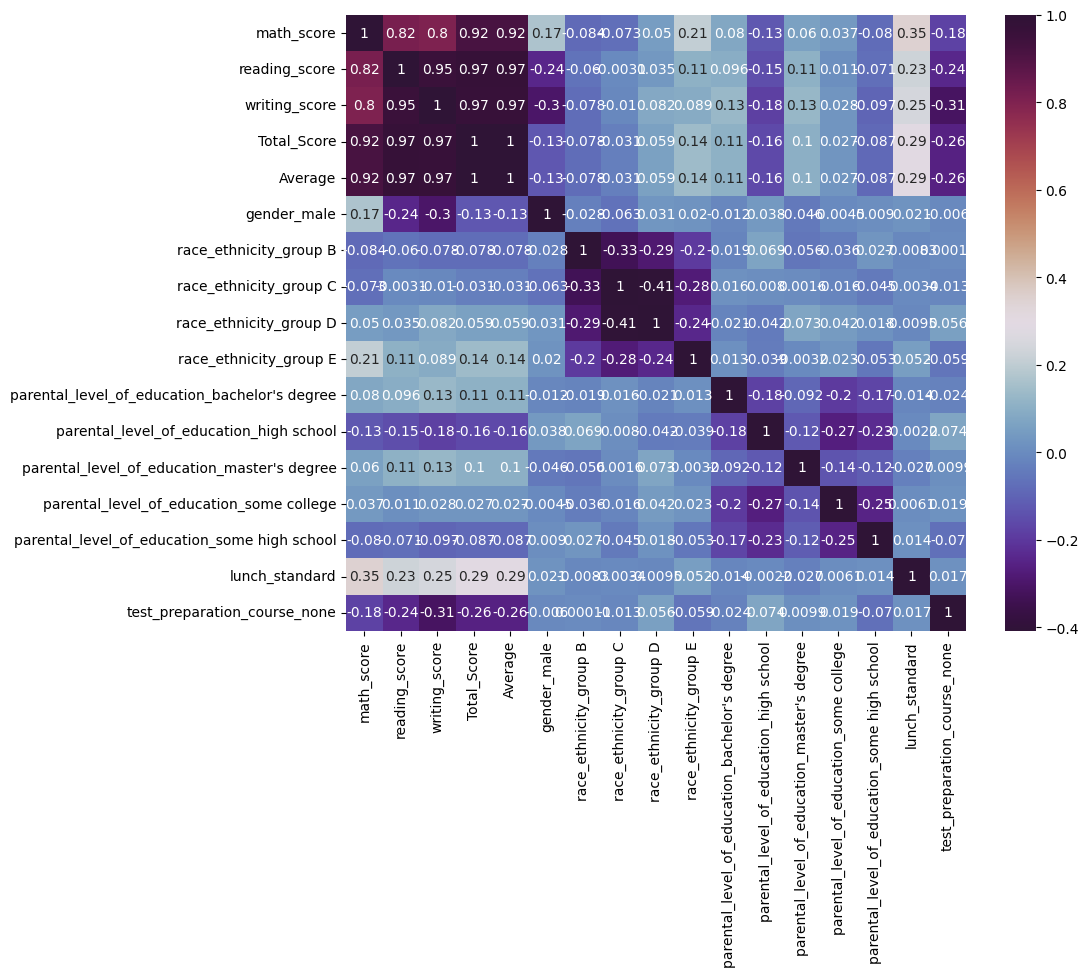

In [123]:

plt.figure(figsize=(10, 8))
sns.heatmap(dff.corr(), annot=True, cmap='twilight_shifted')
plt.show()